In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [13]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [15]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [16]:
train_generator[31][1].shape

(32, 5)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [19]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 1092s 56s/step - loss: 2.0073 - accuracy: 0.2236 - val_loss: 1.6109 - val_accuracy: 0.2108
Epoch 2/20
20/20 [==============================] - 268s 13s/step - loss: 1.6113 - accuracy: 0.2294 - val_loss: 1.6071 - val_accuracy: 0.2417
Epoch 3/20
20/20 [==============================] - 206s 11s/step - loss: 1.6053 - accuracy: 0.2636 - val_loss: 1.6060 - val_accuracy: 0.2425
Epoch 4/20
20/20 [==============================] - 167s 8s/step - loss: 1.6105 - accuracy: 0.2059 - val_loss: 1.6056 - val_accuracy: 0.2432
Epoch 5/20
20/20 [==============================] - 144s 7s/step - loss: 1.6030 - accuracy: 0.2519 - val_loss: 1.6047 - val_accuracy: 0.2432
Epoch 6/20
20/20 [==============================] - 100s 5s/step - loss: 1.6084 - accuracy: 0.2072 - val_loss: 1.6045 - val_accuracy: 0.2432
Epoch 7/20
20/20 [==============================] - 95s 5s/step - loss: 1.6032 - accuracy: 0.2672 - val_loss: 1.6038 - val_accuracy: 0.2432
Epoch 8/20

In [20]:
model.evaluate(validation_generator)

130/130 [==============================] - 6s 44ms/step - loss: 1.5998 - accuracy: 0.2432


[1.5997906923294067, 0.2432432472705841]

In [21]:
res_hist = result.history.keys()
res_hist

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

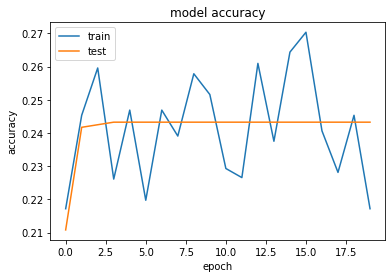

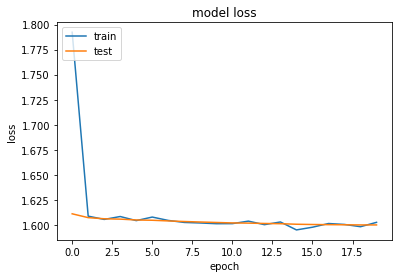

In [22]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_prediction = model.predict(validation_generator)

In [24]:
y_prediction.shape

(1295, 5)

In [25]:
list_val_generator = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list_val_generator.append(validation_generator[i][1][j].tolist())
        except:
              break

In [27]:
np.argmax(y_prediction, axis=1)[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
np.argmax(list_val_generator[0:30],axis=1)

array([4, 3, 0, 1, 3, 0, 1, 4, 4, 0, 3, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 4, 0])